# <center><font color='Blue'>**Mini project: Car price and age**</font></center>
<center> Author: Enkhsaikhan Usny-Ekh

Executive summary of the analysis

This analysis explores the relationship between car price and age for used cars in Chicago and Los Angeles. The analysis finds a negative association: the price is lower, on average, by 11.3% for every additional year of age. 

In [40]:
import warnings

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from IPython.core.display import HTML
import haversine as hs   


warnings.filterwarnings("ignore")

### <span style="color:blue"><b>1. Data Cleaning</b></span>

##### Importing data

In [41]:
df_cars = pd.read_csv('../data/used-cars.csv')

In [42]:
df_cars["lprice"] = np.log(df_cars["price"])

In [43]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pricestr      549 non-null    object 
 1   area          549 non-null    object 
 2   subarea       540 non-null    object 
 3   name          549 non-null    object 
 4   condition     327 non-null    object 
 5   cylinders     360 non-null    object 
 6   drive         294 non-null    object 
 7   fuel          548 non-null    object 
 8   odometer      549 non-null    float64
 9   paintcolor    316 non-null    object 
 10  size          193 non-null    object 
 11  transmission  549 non-null    object 
 12  type          301 non-null    object 
 13  dealer        549 non-null    int64  
 14  price         549 non-null    int64  
 15  lnprice       549 non-null    float64
 16  year          549 non-null    int64  
 17  age           549 non-null    int64  
 18  lnodometer    549 non-null    

In [44]:
# Sorting data by age for further analysis
df_cars = df_cars.sort_values(by="age")
# Droping outliers 
df_cars = df_cars[df_cars["price"]<=80000]

In [45]:
df_cars

,pricestr,area,subarea,name,condition,cylinders,drive,fuel,odometer,paintcolor,...,price,lnprice,year,age,lnodometer,LE,XLE,SE,Hybrid,lprice
87,$16900,chicago,indiana NW,2017 Toyota Camry SE,NaN,NaN,NaN,gas,1.872817,NaN,...,16900,9.735069,2017,1,0.627444,0,0,1,0,9.735069
515,$17000,los angeles,central LA,2017 toyota camry,like new,4 cylinders,fwd,gas,2.000000,black,...,17000,9.740969,2017,1,0.693147,0,0,0,0,9.740969
108,$18495,chicago,chicago S,2017 toyota camry,excellent,4 cylinders,4wd,gas,0.231900,NaN,...,18495,9.825255,2017,1,-1.461449,0,0,0,0,9.825256
432,$18500,los angeles,LA westside-southbay,2017 toyota camry se,like new,4 cylinders,fwd,gas,0.500000,grey,...,18500,9.825526,2017,1,-0.693147,0,0,1,0,9.825526
180,$16499,chicago,chicago city,2017 TOYOTA CAMRY,NaN,NaN,fwd,gas,2.943900,black,...,16499,9.711055,2017,1,1.079735,0,0,0,0,9.711055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,$1500,los angeles,San Fernando,1992 Toyota Camry,good,4 cylinders,fwd,gas,16.800000,grey,...,1500,7.313220,1992,26,2.821379,0,0,0,0,7.313220
316,$950,chicago,chicago N,1992 toyota camry,fair,4 cylinders,fwd,gas,18.500000,silver,...,950,6.856462,1992,26,2.917771,0,0,0,0,6.856462
228,$650,chicago,chicago city,1991 toyota camry,good,4 cylinders,fwd,gas,14.000000,NaN,...,650,6.476973,1991,27,2.639057,0,0,0,0,6.476972
474,$2750,los angeles,LA westside-southbay,1991 toyota camry,NaN,NaN,NaN,gas,15.300000,NaN,...,2750,7.919356,1991,27,2.727853,0,0,0,0,7.919356


### <span style="color:blue"><b>2. Data Analysis</b></span>

##### 1.1. Summary statistics on price and age

In [46]:
df_cars[["price", "age"]].describe(percentiles=[0.25, 0.50, 0.75, 0.95]).T.round(1)

,count,mean,std,min,25%,50%,75%,95%,max
price,548.0,5712.6,4370.7,1.0,2398.8,4250.0,8074.8,14989.3,18500.0
age,548.0,12.2,5.9,1.0,8.0,12.0,16.0,21.0,27.0


##### 1.2. Graphical investigation

##### Scatter plots

The simplest way to see the correlation between two variables is creating scatter plot. From the scatter plot, we can observe that there is a strong correlation between the two variables. Additionally, condition of the car is represented by different markers in the scatter plot to examine variation by condition. However, the graph indicates no significant differences based on condtion. Instead, the prices of cars within the same condition show substantial variation by age, indicating shows age is a strong predictor of car prices.  

Text(48.900489583333325, 0.5, 'Price (US dollars)')

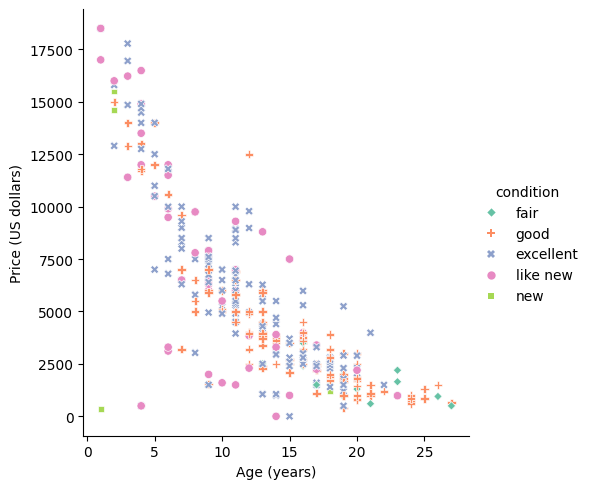

In [47]:
hue_colors = sns.color_palette("Set2")
sns.relplot(x = "age", y="price"
            ,kind = "scatter"
            ,data= df_cars
            ,hue ="condition"
            ,hue_order=["fair", "good", "excellent", "like new", "new"]
            ,palette = hue_colors
            ,style="condition")
plt.xlabel("Age (years)")
plt.ylabel("Price (US dollars)")

Linear vs non-linear regression

As shown in the graph, the correlation between price and age is non-linear, suggesting that models such as Log-Level, Polynomial, or Spline regression are better suited to capture the relationship effectively.

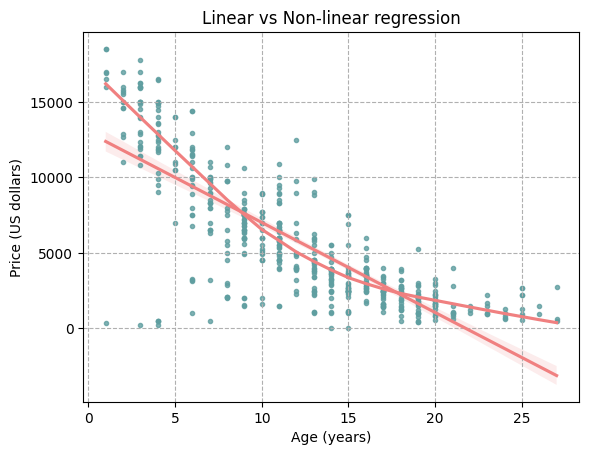

In [48]:
fig, axes = plt.subplots(1, 1)

sns.regplot(x="age", y="price", data=df_cars
            ,fit_reg = True
            ,lowess=False
            ,scatter=True
            ,ci = 95
            ,marker="."
            ,scatter_kws={"color":"white"}
            ,line_kws={"color":"lightcoral"})

sns.regplot(x="age", y="price", data=df_cars
            ,fit_reg = True
            ,lowess=True
            ,scatter=True
            ,ci = 95
            ,marker="."
            ,scatter_kws={"color":"cadetblue"}
            ,line_kws={"color":"lightcoral"})

plt.xlabel("Age (years)")
plt.ylabel("Price (US dollars)")
plt.title("Linear vs Non-linear regression")
plt.grid(linestyle = '--')

### <span style="color:blue"><b>3. Regression analysis</b></span>

Based on on log level regression result, On average, the price is 11.3% lower for each additional year of age. 

In [50]:
reg2 = smf.ols("lprice ~ age", data = df_cars).fit(cov_type="HC1")
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     433.5
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           2.62e-71
Time:                        19:16:03   Log-Likelihood:                -628.56
No. Observations:                 548   AIC:                             1261.
Df Residuals:                     546   BIC:                             1270.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6637      0.077    125.363      0.0